In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import seaborn as sns

colors = sns.diverging_palette(150, 275, s=80, l=55, n=2) #green to purple
colors[0], colors[1] = colors[1], colors[0] # switch colors
cmap = 'PRGn'

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

## Time and Date of the experiment

In [4]:
print(ib.date)

2021-03-30 01:34:18.096039


## True Posteriors
There are five true posteriors for five simulation dataset: [['Gaussian XOR', 'Uniform XOR', 'Spiral', 'Gaussian R-XOR', 'Gaussian S-XOR']]

In order to construct true posterior for spiral dataset, the "skeletal" backbone was laid out where gaussian posterior is drawn at each point

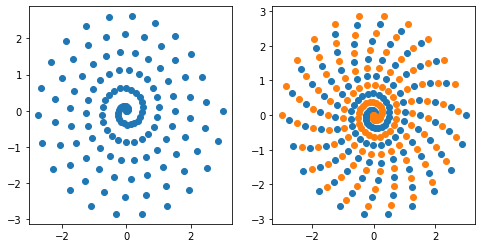

In [5]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

a,b = ib.spiral #N=400, rng=3
ax[0].scatter(a[:,0],a[:,1])
ax[1].scatter(a[:,0],a[:,1])
ax[1].scatter(b[:,0],b[:,1])

## Generates a new set of posterior by 'get_posterior'

In [6]:
kwargs = {'h': 0.01, 'sig':0.25, 'rng':3, 'spirals':400}

# ib.get_posterior(**kwargs)

## Saves the current posterior by 'load_posterior'

In [7]:
# ib.load_posterior(save=True)

## Loads previously saved set of posterior

In [8]:
ib.load_posterior()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded


## True posterior within square bbox

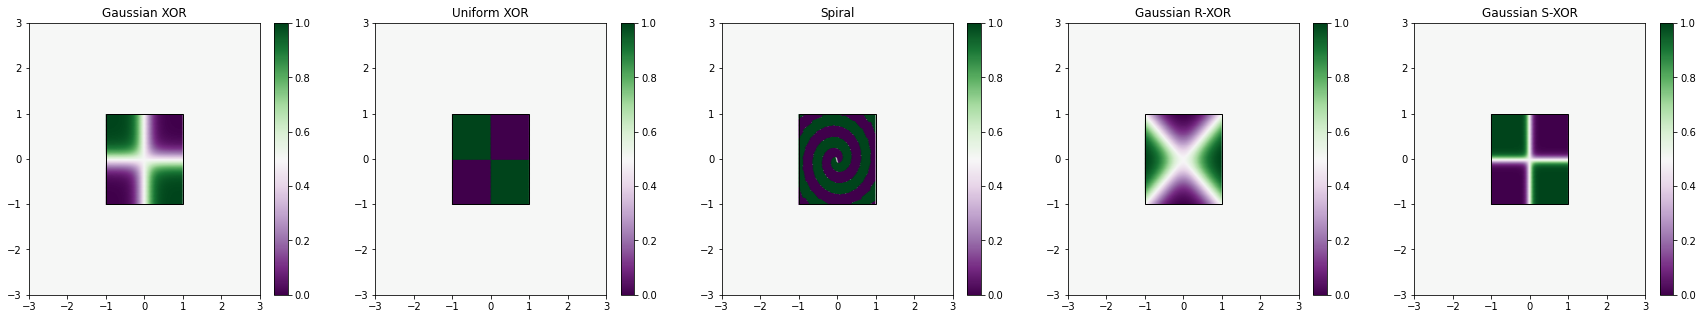

In [9]:
fig, axs = plt.subplots(1,5, figsize=(6*5,5))

for i in range(5):
    tx, ty, tc = ib.truepst[0][i]

    mlp = axs[i].scatter(tx,ty, c=tc, s=1, cmap='PRGn')
    fig.colorbar(mlp, ax=axs[i])
    axs[i].set_title(ib.dtype[i])
    axs[i].add_patch(Rectangle(xy=(-1,-1), width=2, height=2, edgecolor='k', fill=False))
    axs[i].set_xlim([-3,3]);
    axs[i].set_ylim([-3,3]);

## True posterior within circular bbox

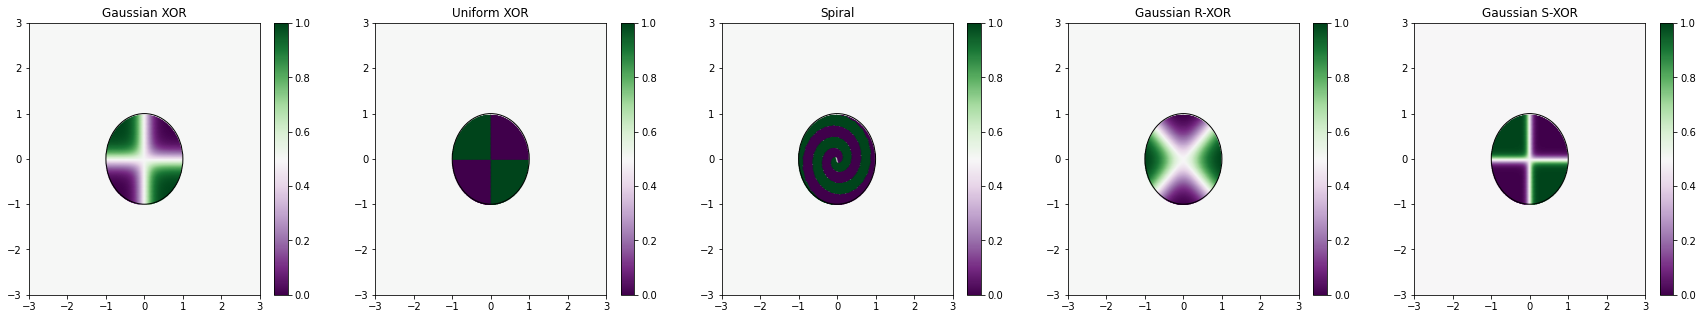

In [10]:
fig, axs = plt.subplots(1,5, figsize=(6*5,5))

for i in range(5):
    tx, ty, tc = ib.truepst[1][i]

    mlp = axs[i].scatter(tx,ty, c=tc, s=1, cmap='PRGn')
    fig.colorbar(mlp, ax=axs[i])
    axs[i].set_title(ib.dtype[i])
    axs[i].add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))
    axs[i].set_xlim([-3,3]);
    axs[i].set_ylim([-3,3]);